# Image Processing


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [ ]:
files.upload()

Saving giraffe.jpeg to giraffe.jpeg


{'giraffe.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTR

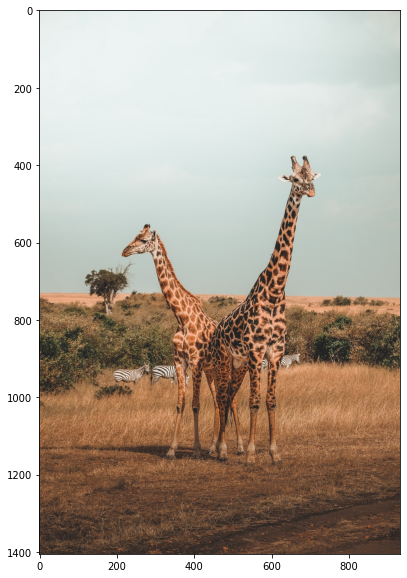

In [ ]:
img = cv2.imread('/content/giraffe.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_img(img_rgb)

- Apply a binary threshold onto the image.

In [ ]:
img = cv2.imread('/content/giraffe.jpeg', 0)

In [ ]:
ret, thres = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

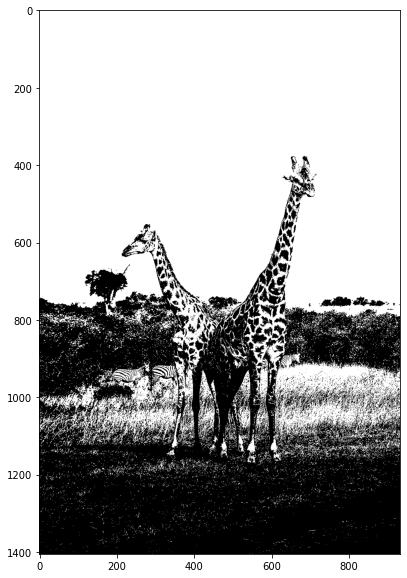

In [ ]:
display_img(thres, 'gray')

- convert colorspace to HSV, and display it

In [ ]:
img = cv2.imread('/content/giraffe.jpeg')
print(img.shape)

(1405, 933, 3)


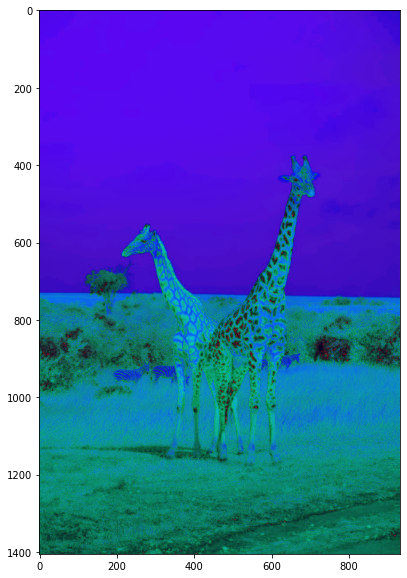

In [ ]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
display_img(img_HSV)

- Create a low pass filter with a 4 by 4 kernel filled with values of 1/10(0.1), and then use 2D convolution to blur the image 

In [ ]:
img = cv2.imread('/content/giraffe.jpeg')
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(1405, 933, 3)


In [ ]:
kernel = np.ones((4, 4), np.float32) / (10)
print(kernel)

[[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]


In [ ]:
dst = cv2.filter2D(img, -1, kernel)

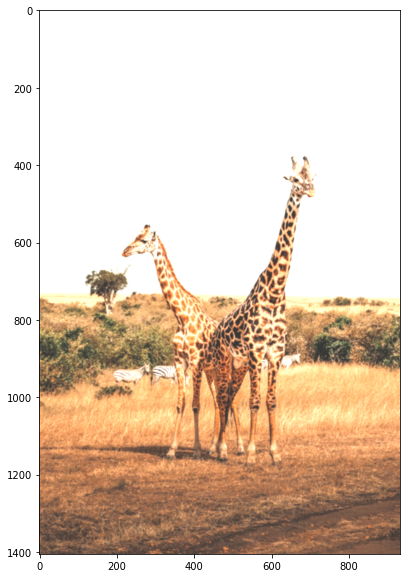

In [ ]:
display_img(dst)

- Create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image, and display the result

(1405, 933)


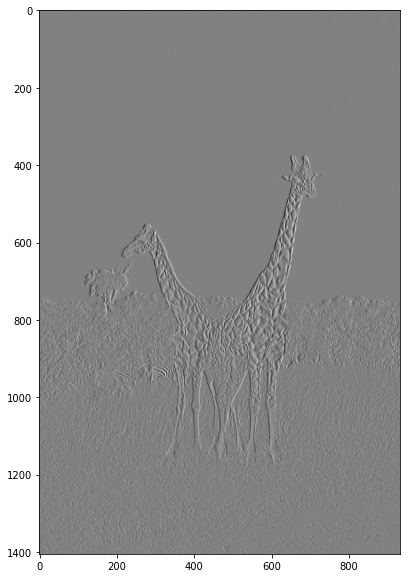

In [ ]:
img = cv2.imread('/content/giraffe.jpeg', 0)
print(img.shape)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
display_img(sobelx, 'gray')

- Plot the color histograms for the RED, BLUE, and GREEN channel of the image.

In [ ]:
img = cv2.imread('/content/giraffe.jpeg')
img_b = img[:,:,0]
img_g = img[:,:,1]
img_r = img[:,:,2]
print(img_b.shape)
print(img_g.shape)
print(img_r.shape)

(1405, 933)
(1405, 933)
(1405, 933)


In [ ]:
hist_b = cv2.calcHist([img_b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img_g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([img_r], [0], None, [256], [0, 256])

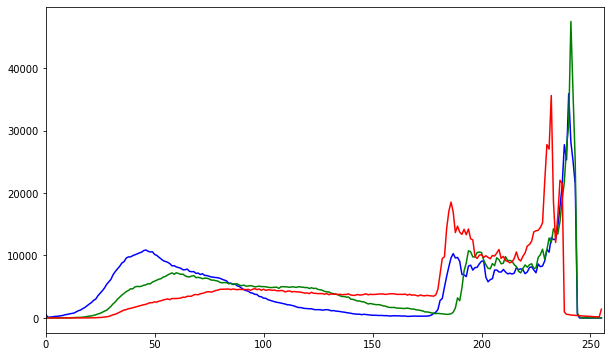

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.xlim([0, 256])

plt.show()